# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Load Dataset

In [2]:
from google.colab import drive
drive.mount('//content//drive')

Mounted at //content//drive


In [3]:
df1=pd.read_excel("/content/drive/MyDrive/CSE 422 Final Project/urdu_final__label_dataset.xlsx")

In [4]:
df1

,user_name,comment,brand,gender,label
0,Muhammad Ahmed,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، ...,Dell,Male,1.0
1,Fatima Ali,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...,HP,Female,1.0
2,Ali Hassan,لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے می...,Lenovo,Male,1.0
3,Aisha Khan,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیں۔ڈیزائ...,Apple,Female,1.0
4,Usman Malik,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...,Asus,Male,1.0
...,...,...,...,...,...
3040,Usman Malik,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...,"Asus,",NaN,NaN
3041,Hina Khan,میں نے ایک نئے ڈیل لیپ ٹاپ میں اپ گریڈ کیا ، ا...,Dell,NaN,NaN
3042,Asad Mahmood,پیشہ ور افراد کے لئے hp لیپ ٹاپ ایک بہترین انت...,HP,NaN,NaN
3043,Farah Abbas,مجھے اپنا لینووو لیپ ٹاپ پسند ہے۔یہ میرے کام ک...,Lenovo,NaN,NaN


# Overview of Dataset

Futures in Dataset

In [5]:
features = df1.columns
print("Features of the DataFrame:")
print(features)


Features of the DataFrame:
Index(['user_name', 'comment', 'brand', 'gender', 'label'], dtype='object')


In [6]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3045 entries, 0 to 3044
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_name  3045 non-null   object 
 1   comment    3045 non-null   object 
 2   brand      3045 non-null   object 
 3   gender     2931 non-null   object 
 4   label      2931 non-null   float64
dtypes: float64(1), object(4)
memory usage: 119.1+ KB


In [7]:
df1.groupby("label").describe()

user_name                               comment         \
          count unique               top freq   count unique   
label                                                          
0.0         858    475  Shahista Khatoon   30     858    849   
1.0        1259    844         Miss Zuha   12    1259   1223   
2.0         814    757            Ayesha    3     814    788   

                                                              brand         \
                                                     top freq count unique   
label                                                                        
0.0    asus لیپ ٹاپ دستیاب ٹھنڈک کے اختیارات کی ایک م...    2   858     28   
1.0    لینوو یوگا بوک c940 بہترین قابلیتوں کے ساتھ آت...    3  1259     27   
2.0              اس Razer لیپ ٹاپ کی گیمنگ کیسی ہوتی ہے؟    2   814     40   

                   gender                    
          top freq  count unique   top freq  
label                                        
0.0    Lenovo  148    858      2  Male  463  
1.0    Lenovo  308   1259      2  Male  831  
2.0      Asus  170    814      2  Male  548

In [8]:
print("Number of rows:", df1.shape[0])
print("Number of columns:", df1.shape[1])


Number of rows: 3045
Number of columns: 5


In [9]:
print("Missing values:\n", df1.isnull().sum())


Missing values:
 user_name      0
comment        0
brand          0
gender       114
label        114
dtype: int64


In [10]:
name_counts = df1['user_name'].value_counts()
print("Name Counts:")
print(name_counts)


Name Counts:
Miss Zuha           41
Shahista Khatoon    39
Benjamin            33
Natalie             30
Liam                29
                    ..
Amit S               1
Avirit Ghosh         1
JOKR                 1
John David           1
Mohammed Yaseen      1
Name: user_name, Length: 1862, dtype: int64


In [11]:
unique_comments_count = df1['comment'].nunique()
print("Number of Unique Comments:", unique_comments_count)


Number of Unique Comments: 2902


In [12]:
df1['comment_length'] = df1['comment'].str.len()
max_length = df1['comment_length'].max()
min_length = df1['comment_length'].min()
print("Maximum Comment Length:", max_length)
print("Minimum Comment Length:", min_length)
df1

Maximum Comment Length: 891
Minimum Comment Length: 9


,user_name,comment,brand,gender,label,comment_length
0,Muhammad Ahmed,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، ...,Dell,Male,1.0,144
1,Fatima Ali,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...,HP,Female,1.0,151
2,Ali Hassan,لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے می...,Lenovo,Male,1.0,145
3,Aisha Khan,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیں۔ڈیزائ...,Apple,Female,1.0,126
4,Usman Malik,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...,Asus,Male,1.0,154
...,...,...,...,...,...,...
3040,Usman Malik,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...,"Asus,",NaN,NaN,154
3041,Hina Khan,میں نے ایک نئے ڈیل لیپ ٹاپ میں اپ گریڈ کیا ، ا...,Dell,NaN,NaN,137
3042,Asad Mahmood,پیشہ ور افراد کے لئے hp لیپ ٹاپ ایک بہترین انت...,HP,NaN,NaN,145
3043,Farah Abbas,مجھے اپنا لینووو لیپ ٹاپ پسند ہے۔یہ میرے کام ک...,Lenovo,NaN,NaN,140


In [13]:
df1['comment_length'] = df1['comment'].str.len()
average_length = df1['comment_length'].mean()
print("Average Comment Length:", average_length)

Average Comment Length: 83.58390804597701


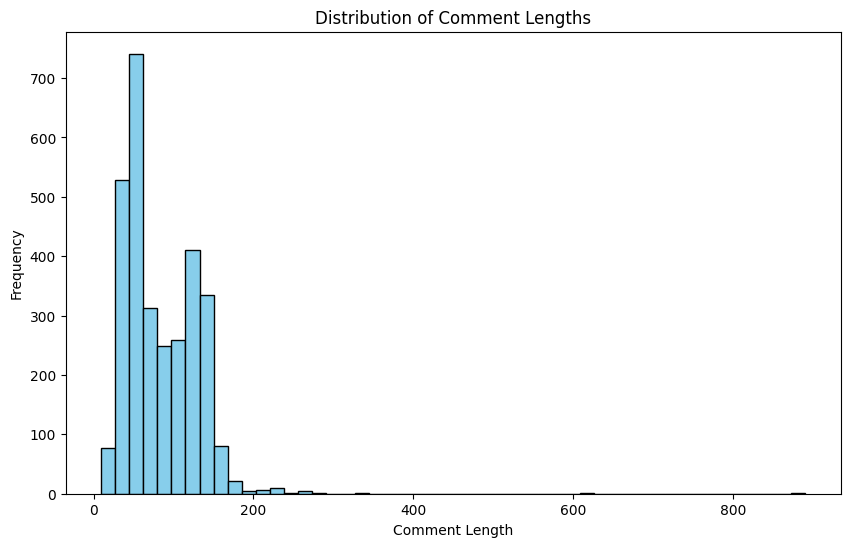

In [14]:
import matplotlib.pyplot as plt
df1['comment_length'] = df1['comment'].str.len()
plt.figure(figsize=(10, 6))
plt.hist(df1['comment_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


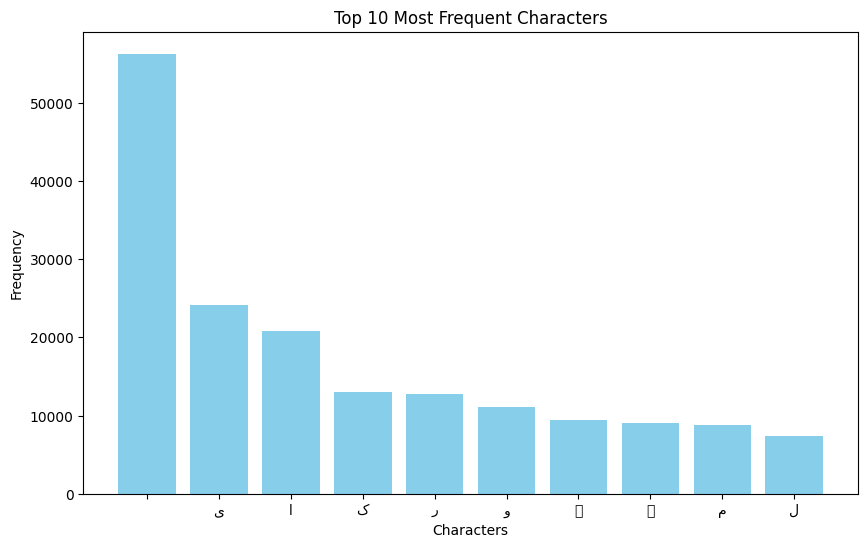

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
all_comments = ' '.join(df1['comment'])
char_counts = Counter(all_comments)
top_n = 10  # Adjust as needed
top_char_counts = char_counts.most_common(top_n)
top_chars = [char_count[0] for char_count in top_char_counts]
top_counts = [char_count[1] for char_count in top_char_counts]
plt.figure(figsize=(10, 6))
plt.bar(top_chars, top_counts, color='skyblue')
plt.title(f'Top {top_n} Most Frequent Characters')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


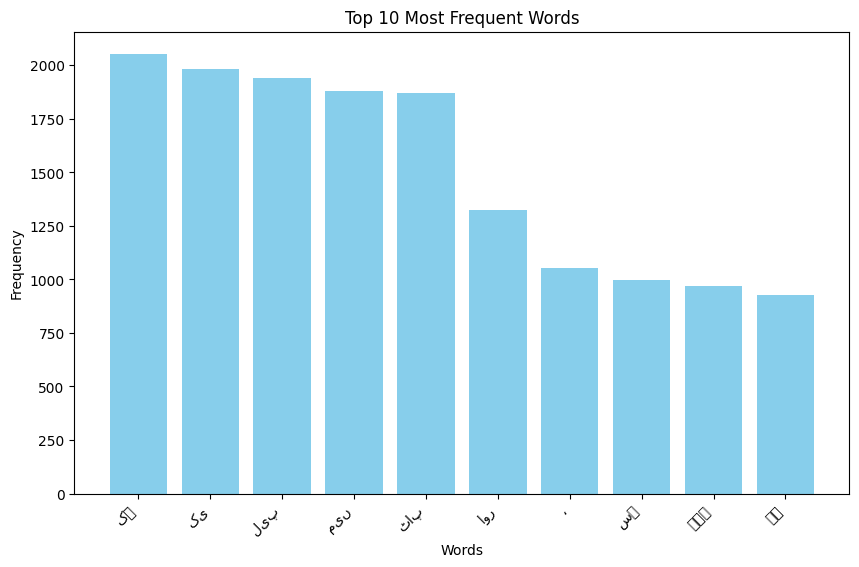

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
all_comments = ' '.join(df1['comment'])
words = all_comments.split()
word_counts = Counter(words)

top_n = 10  # Adjust as needed
top_word_counts = word_counts.most_common(top_n)

top_words = [word_count[0] for word_count in top_word_counts]
top_counts = [word_count[1] for word_count in top_word_counts]
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_counts, color='skyblue')
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
print("Unique values in a specific column:", df1['comment'].unique())

Unique values in a specific column: ['میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، اور میں اس کی کارکردگی سے انتہائی مطمئن ہوں۔یہ تیز ، قابل اعتماد ، اور بیٹری کی زندگی متاثر کن ہے۔'
 'میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں ، اور میں اس کی سفارش نہیں کرسکتا۔تعمیر کا معیار بہترین ہے ، اور یہ آسانی سے ملٹی ٹاسکنگ کو سنبھالتا ہے۔'
 'لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے میں آرام دہ ہے ، اور ڈسپلے کرکرا اور متحرک ہے۔اس کے علاوہ ، وہ قیمت کے ل great بڑی قیمت پیش کرتے ہیں۔'
 ... 'کیا تمام ایپل لیپ ٹاپ میک بوک ہیں ؟؟؟'
 'آپ لینووو تھنک پیڈ بھائی کے بارے میں کیا سوچتے ہیں؟'
 'کیا میک بوک ایئر I3 2020 قابل ہے']


In [ ]:
print("Count of each gender:")
print(df1['gender'].value_counts())


Count of each gender:
Male      1842
Female    1089
Name: gender, dtype: int64


In [ ]:
print("Unique brands:", df1['brand'].unique())

Unique brands: ['Dell' 'HP' 'Lenovo' 'Apple' 'Asus' 'Acer' 'Microsoft' 'Sony' 'Samsung'
 'Western Digital' 'PlayStation' 'Nikon' 'Epson' 'LG' 'Logitech' 'JBL'
 'Seagate' 'Huawei' 'Toshiba' 'Xiaomi' 'Fujitsu' 'Razer' 'MSI' 'Xolo'
 'Daten' 'IBM' 'Gigabyte' 'Gateway' 'Vaio' 'Panasonic' 'Evoo' 'Medion'
 'Dynabook' 'Msi' 'Alienware' 'Infinix' 'Zyrex' 'Realme' 'Nokia' 'Honor'
 'NEC' 'Walton' 'Eurocom' 'Geo' 'AcerAspire' 'Google' 'Apple,' 'Asus,']


In [ ]:
print("Count of each brand:")
print(df1['brand'].value_counts())


Count of each brand:
Lenovo             530
HP                 470
Asus               452
Dell               399
Apple              368
Acer               179
Samsung            129
Microsoft           78
Gigabyte            60
Huawei              53
LG                  45
Xiaomi              41
IBM                 41
Toshiba             40
Sony                22
Honor               21
Msi                 12
NEC                 11
Razer               10
Realme               8
Infinix              8
Zyrex                7
Dynabook             6
Fujitsu              6
Xolo                 6
Vaio                 5
Daten                5
MSI                  5
Panasonic            3
Eurocom              3
Gateway              2
Apple,               2
Alienware            2
Nokia                2
Western Digital      1
Google               1
AcerAspire           1
Geo                  1
Walton               1
Nikon                1
PlayStation          1
Epson                1
Logitech     

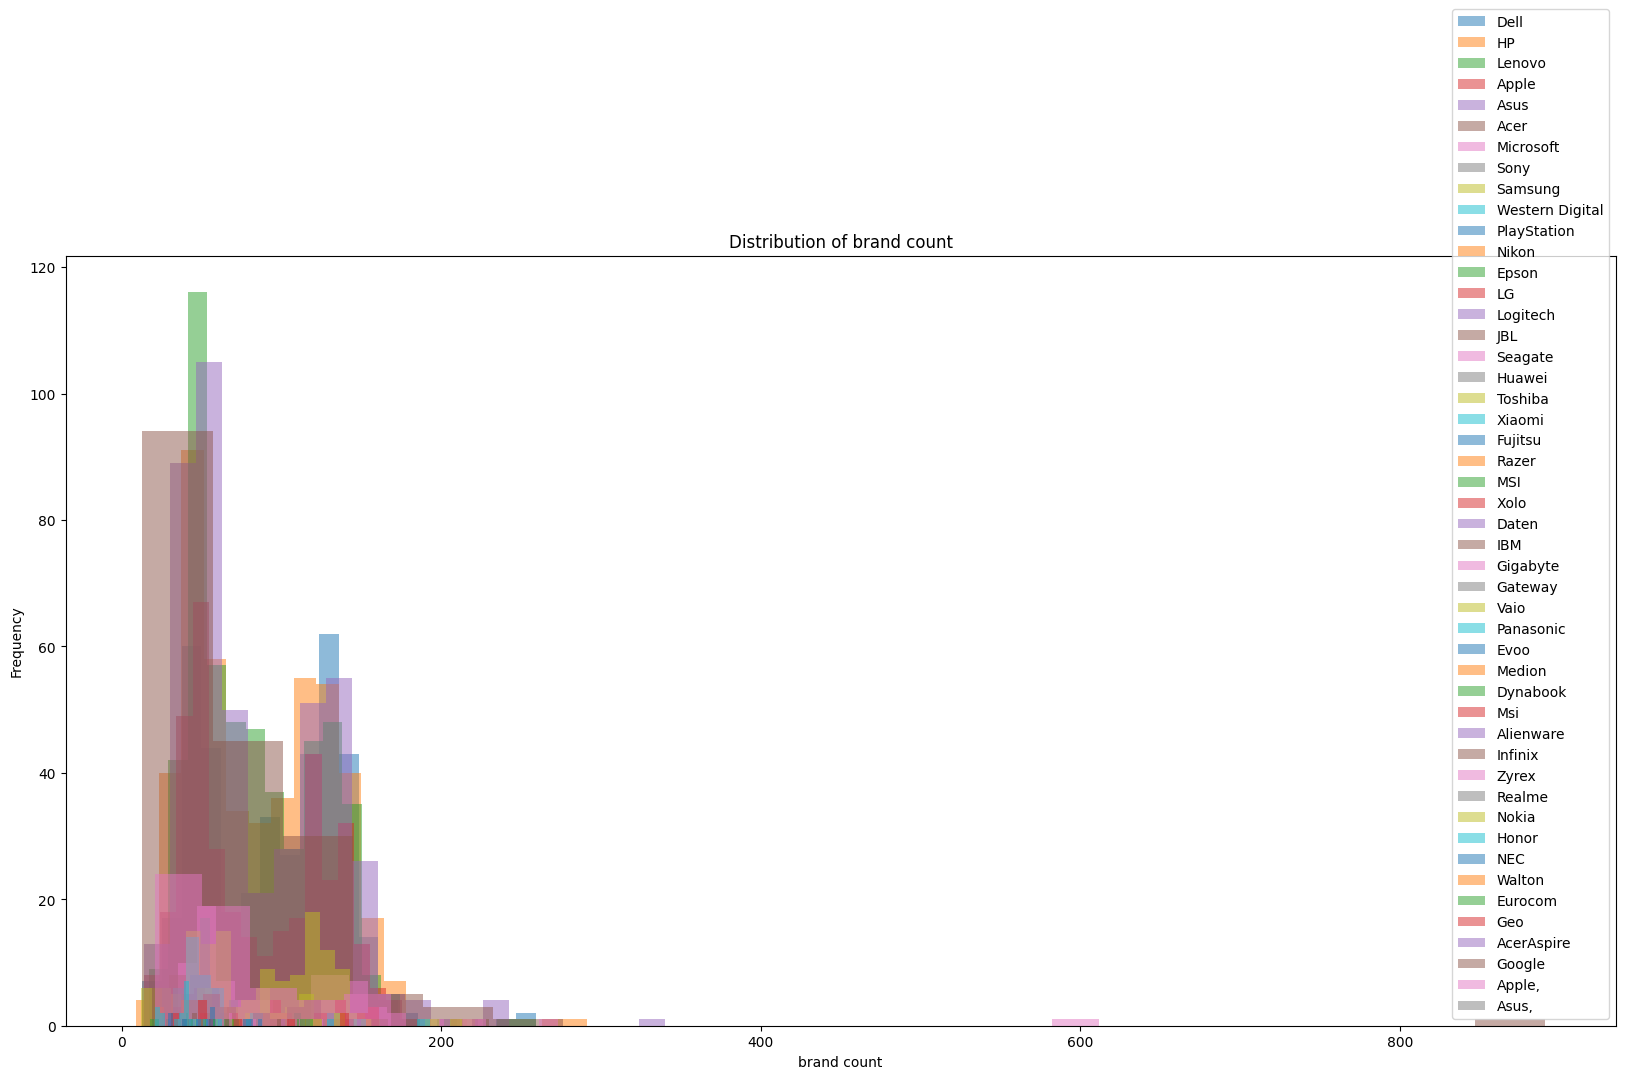

In [ ]:
import matplotlib.pyplot as plt
unique_brands = df1['brand'].unique()
plt.figure(figsize=(20, 10))
for brand in unique_brands:
    brand_comments = df1[df1['brand'] == brand]
    plt.hist(brand_comments['comment_length'], bins=20, alpha=0.5, label=brand)

plt.title('Distribution of brand count')
plt.xlabel('brand count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

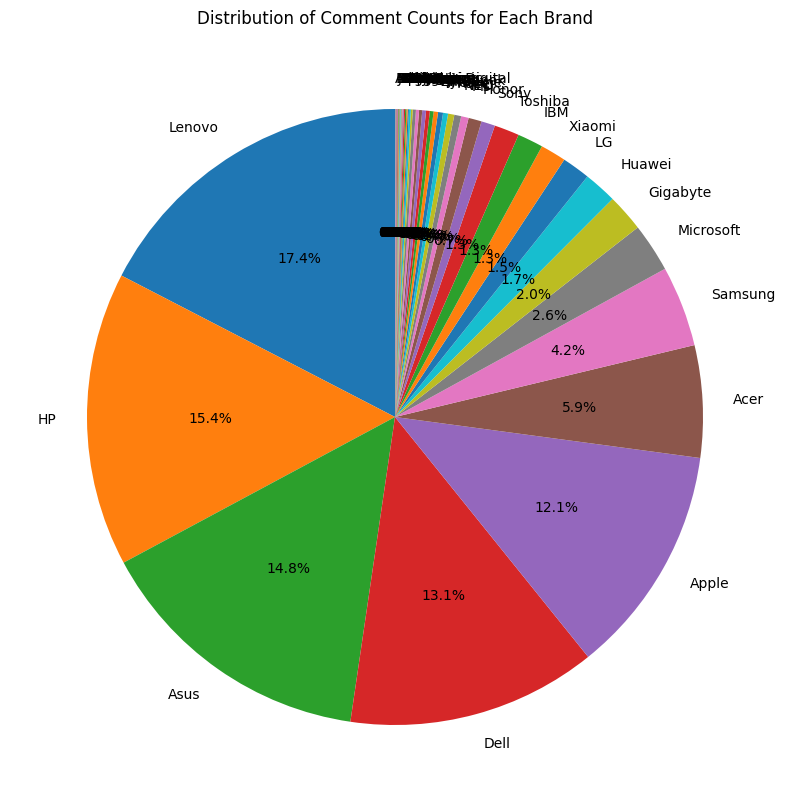

In [ ]:
import matplotlib.pyplot as plt
brand_counts = df1['brand'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Comment Counts for Each Brand')
plt.show()


In [ ]:
print("Correlation matrix:\n", df1.corr())


Correlation matrix:
                    label  comment_length
label           1.000000       -0.419775
comment_length -0.419775        1.000000


<ipython-input-25-e9dd613d3c82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Correlation matrix:\n", df1.corr())


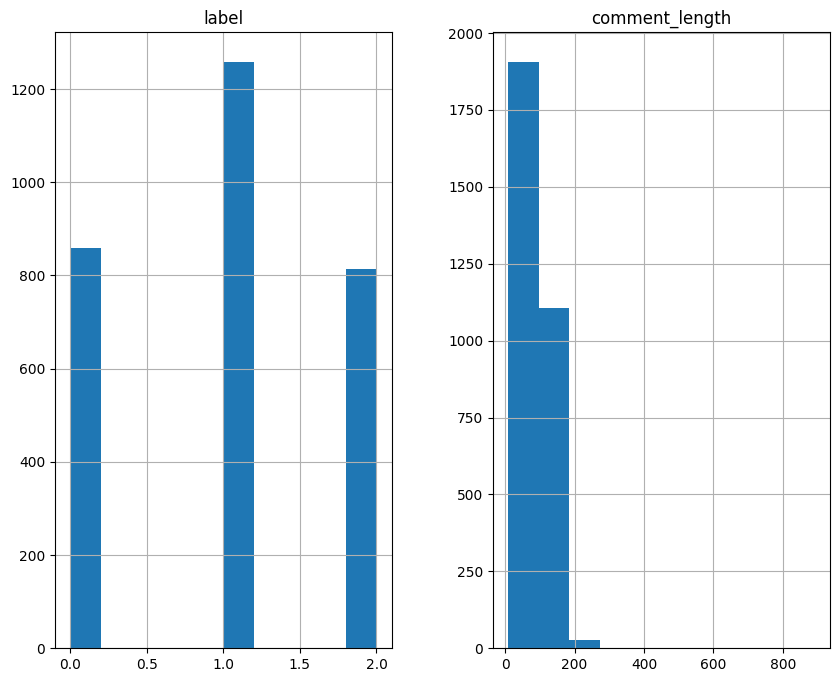

In [ ]:
import matplotlib.pyplot as plt
df1.hist(figsize=(10, 8))
plt.show()


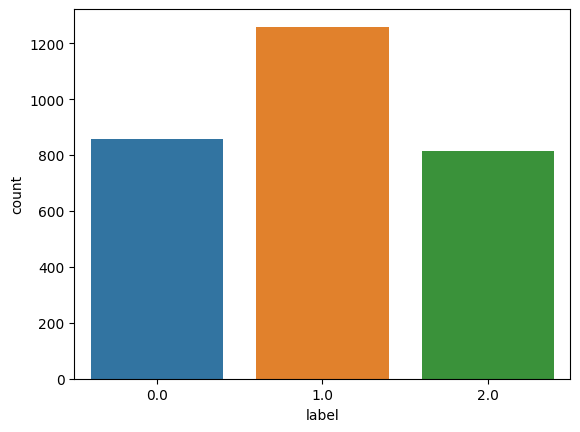

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df1)
plt.show()


In [ ]:
print("Unique genders:", df1['gender'].unique())

Unique genders: ['Male' 'Female' nan]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/

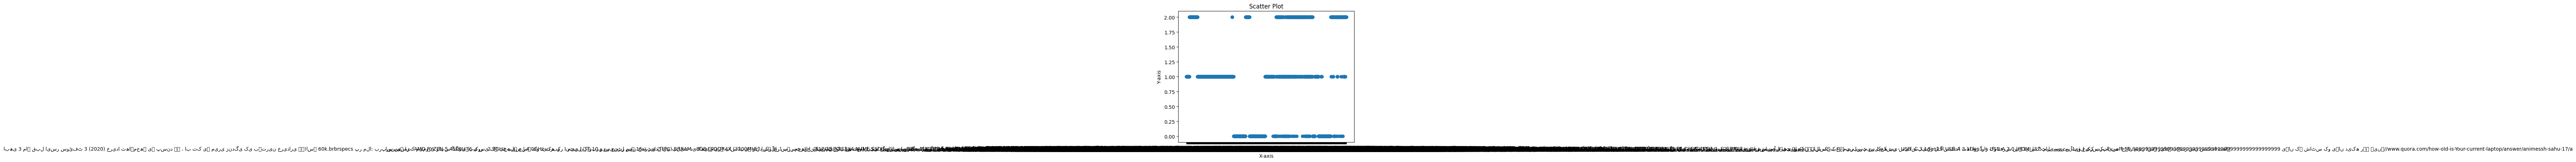

In [ ]:
import matplotlib.pyplot as plt
x = df1["comment"]
y = df1["label"]
plt.scatter(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')
plt.show()


# Data Pre-Processing

In [18]:
pp_df = df1.copy()


##1. Null values

In [19]:
 print("Missing values:\n", pp_df.isnull().sum())


Missing values:
 user_name           0
comment             0
brand               0
gender            114
label             114
comment_length      0
dtype: int64


In [20]:
pp_df = pp_df.dropna()


In [21]:
 print("Missing values:\n", pp_df.isnull().sum())


Missing values:
 user_name         0
comment           0
brand             0
gender            0
label             0
comment_length    0
dtype: int64


In [22]:
pp_df

,user_name,comment,brand,gender,label,comment_length
0,Muhammad Ahmed,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، ...,Dell,Male,1.0,144
1,Fatima Ali,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...,HP,Female,1.0,151
2,Ali Hassan,لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے می...,Lenovo,Male,1.0,145
3,Aisha Khan,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیں۔ڈیزائ...,Apple,Female,1.0,126
4,Usman Malik,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...,Asus,Male,1.0,154
...,...,...,...,...,...,...
3031,shiva ganesh,بھائی بہت سے لوگ ایم آئی نوٹ بک اور اسوس کو تر...,Asus,Male,0.0,67
3032,kpop_pabo,براہ کرم میک بوک پرو کا جائزہ لیں,Apple,Female,2.0,33
3033,anonim mus,میں پروگرامنگ کر رہا ہوں ، کیا مجھے انٹیل یا ر...,Asus,Female,2.0,62
3034,Dr. Satyam Upadhyay,اس کے پاس گیمنگ پی سی ہے,Gigabyte,Male,2.0,24


In [23]:
pip install seaborn


<ipython-input-24-24b9a27ede6f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = pp_df.corr()


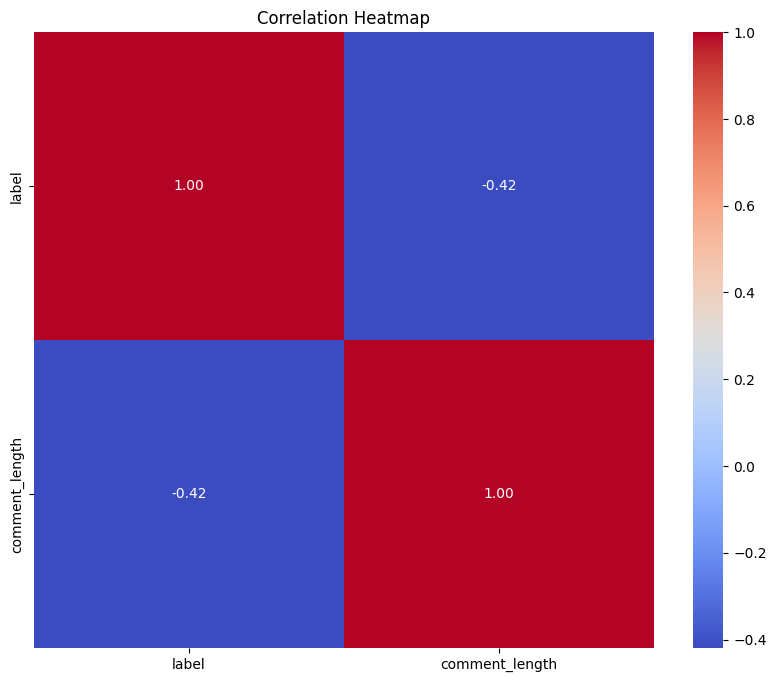

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = pp_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

plt.show()


##2. Removal of Extra colunms

In [ ]:
columns_to_remove = ['comment_length']

pp_df.drop(columns=columns_to_remove, axis=1, inplace=True)


In [ ]:
pp_df

,user_name,comment,brand,gender,label
0,Muhammad Ahmed,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، ...,Dell,Male,1.0
1,Fatima Ali,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...,HP,Female,1.0
2,Ali Hassan,لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے می...,Lenovo,Male,1.0
3,Aisha Khan,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیں۔ڈیزائ...,Apple,Female,1.0
4,Usman Malik,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...,Asus,Male,1.0
...,...,...,...,...,...
3031,shiva ganesh,بھائی بہت سے لوگ ایم آئی نوٹ بک اور اسوس کو تر...,Asus,Male,0.0
3032,kpop_pabo,براہ کرم میک بوک پرو کا جائزہ لیں,Apple,Female,2.0
3033,anonim mus,میں پروگرامنگ کر رہا ہوں ، کیا مجھے انٹیل یا ر...,Asus,Female,2.0
3034,Dr. Satyam Upadhyay,اس کے پاس گیمنگ پی سی ہے,Gigabyte,Male,2.0


##3. Data Augumentation

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
X_comments = pp_df['comment'].values.reshape(-1, 1)
X_users = pp_df['user_name'].values.reshape(-1, 1)
X_brands = pp_df['brand'].values.reshape(-1, 1)
X_gender = pp_df['gender'].values.reshape(-1, 1)
gender_encoder = LabelEncoder()
X_gender_encoded = gender_encoder.fit_transform(X_gender)
y = pp_df['label']
class_counts = y.value_counts()
print("Class distribution before balancing:")
print(class_counts)
target_size = max(class_counts)
X_features = pd.concat([
    pd.DataFrame(X_comments, columns=['comment']),
    pd.DataFrame(X_users, columns=['user_name']),
    pd.DataFrame(X_brands, columns=['brand']),
    pd.DataFrame(X_gender_encoded, columns=['gender'])
], axis=1)
oversampler = RandomOverSampler(sampling_strategy={0: target_size, 1: target_size, 2: target_size})
X_balanced, y_balanced = oversampler.fit_resample(X_features, y)
# Count the class distribution after balancing
balanced_class_counts = y_balanced.value_counts()
print("\nClass distribution after balancing:")
print(balanced_class_counts)
X_balanced['gender'] = gender_encoder.inverse_transform(X_balanced['gender'])
pp_df = pd.concat([X_balanced, y_balanced], axis=1)

Class distribution before balancing:
1.0    1259
0.0     858
2.0     814
Name: label, dtype: int64

Class distribution after balancing:
1.0    1259
2.0    1259
0.0    1259
Name: label, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


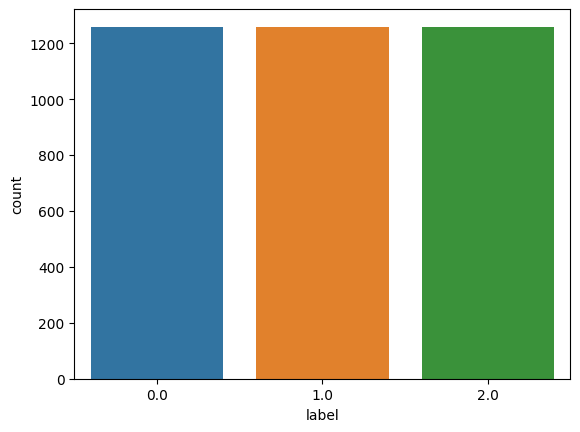

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=pp_df)
plt.show()


##4. Remove URDU_PUNCTUATIONS

In [ ]:
import string
urdu_punctuations = "؛؟،٫٬«»‘’“”(){}[]:;،.?!~@#$%^&*+-*/_=<>"
pp_df['comment'] = pp_df['comment'].apply(lambda text: text.translate(str.maketrans('', '', urdu_punctuations)))


In [ ]:
import re
def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]|_+', '', text)
    cleaned_text = re.sub(r'http\S+|www\S+|https\S+', '', cleaned_text)
    cleaned_text = re.sub(r'youtube\S+', '', cleaned_text)
    cleaned_text = re.sub(r'[(){}\[\]]', '', cleaned_text)
    cleaned_text = re.sub(r'[&#<>\\/|]', '', cleaned_text)
    return cleaned_text
pp_df['comment'] = pp_df['comment'].apply(clean_text)

In [ ]:
URDU_PUNCTUATIONS = ['\200F', '\u200f', '۔', '٫', '٪', '؟', '،', ')', '(', '{', '}', '…', '۔۔۔', '\u002F', '\u003F']
def removing_punctuations(text):
    for i in text:
        if i in URDU_PUNCTUATIONS:
            text = text.replace(i, " ")
    return text

pp_df['comment'] = pp_df['comment'].apply(removing_punctuations)
pp_df.head()


,comment,user_name,brand,gender,label
0,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ا...,Muhammad Ahmed,Dell,Male,1.0
1,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...,Fatima Ali,HP,Female,1.0
2,لینووو لیپ ٹاپ لاجواب ہیںکی بورڈ ٹائپ کرنے میں...,Ali Hassan,Lenovo,Male,1.0
3,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیںڈیزائن...,Aisha Khan,Apple,Female,1.0
4,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوںوہ طاقتو...,Usman Malik,Asus,Male,1.0


## 5. Removel of Emojis

In [ ]:
pip install demoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
import demoji
import re
demoji.download_codes()

def remove_emojis_and_urls(text):
    text_without_emojis = demoji.replace(text, '')
    text_without_urls = re.sub(r'http\S+', '', text_without_emojis)

    return text_without_urls
pp_df['comment'] = pp_df['comment'].apply(remove_emojis_and_urls)

<ipython-input-43-2190768e592c>:3: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


##6. Removal of urdu stopwords

In [ ]:
stop_words = frozenset("""
آ آئی آئیں آئے آتا آتی آتے آداب آدھ آدھا آدھی آدھے آس
 آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 اتوار ارب اربویں ارے اس اسکا اسکی اسکے اسی اسے اف افوہ الاول البتہ
 الثانی الحرام السلام الف المکرم ان اندر انکا انکی انکے انہوں انہی انہیں
 اوئے اور اوپر اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکبر اکثر اگر اگرچہ
 اگست اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر بج بجے
 بخیر برسات بشرطیکہ بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں
 بھی بہار بہت بہتر بیگم تاکہ تاہم تب تجھ تجھی تجھے ترا تری
 تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے
 تہائی تیرا تیری تیرے تین جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے
 جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے جیٹھ حالانکہ حالاں حصہ حضرت خاطر خالی خدا خزاں خواہ خوب
 خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوشنبہ دوں دکھائیں دگنا دی
 دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے
 رکھا رکھتا رکھتی رکھتے رکھنا رکھنی رکھنے رکھو رکھی رکھے رہ رہا رہتا
 رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سلام سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شام شاید
 شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین فروری فقط فلاں
 فی قبل قطا لائی لائے لاتا لاتی لاتے لانا لانی لایا لو لوجی لوگوں
 لگ لگا لگتا لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن
 لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمی محض مرا مرحبا
 مری مرے مزید مس مسز مسٹر مطابق مطلق مل منٹ منٹوں مکرمی مگر
 مگھر مہربانی میرا میروں میری میرے میں نا نزدیک نما نو نومبر نہ نہیں
 نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ
 وعلیکم وغیرہ ولے وگرنہ وہ وہاں وہی وہیں ویسا ویسے ویں پاس
 پایا پر پس پلیز پون پونا پونی پونے پھاگن پھر پہ پہر پہلا پہلی
 پہلے پیر پیچھے چاہئے چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ
 چوگنی چکی چکیں چکے چہارشنبہ چیت ڈالنی ڈالنے ڈالے کئے کا کاتک کاش کب
 کبھی کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس
 کسی کسے کل کم کن کنہیں کو کوئی کون کونسا کونسے کچھ کہ کہا
 کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے
 گئی گئے گا گرما گرمی گنا گو گویا گھنٹا گھنٹوں گھنٹے گی گیا
 ہائیں ہائے ہاڑ ہاں ہر ہرچند ہرگز ہزار ہفتہ ہم ہمارا ہماری ہمارے ہمی
 ہمیں ہو ہوئی ہوئیں ہوئے ہوا ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی
 ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in stop_words)


pp_df['comment'] =  pp_df['comment'].apply(remove_stopwords)
pp_df.head(9)

,comment,user_name,brand,gender,label
0,حال ڈیل لیپ ٹاپ خریدا کارکردگی انتہائی مطمئن ہ...,Muhammad Ahmed,Dell,Male,1.0
1,برسوں hp لیپ ٹاپ استعمال سفارش کرسکتاتعمیر معی...,Fatima Ali,HP,Female,1.0
2,لینووو لیپ ٹاپ لاجواب ہیںکی بورڈ ٹائپ آرام دہ ...,Ali Hassan,Lenovo,Male,1.0
3,ایپل میک بوکس بہترین لیپ ٹاپ ہیںڈیزائن چیکنا آ...,Aisha Khan,Apple,Female,1.0
4,asus لیپ ٹاپ بڑا پرستار ہوںوہ طاقتور قابل اعتم...,Usman Malik,Asus,Male,1.0
5,نئے ڈیل لیپ ٹاپ گریڈ گیم چینجر ہےرفتار کارکردگ...,Hina Khan,Dell,Female,1.0
6,پیشہ ور افراد لئے hp لیپ ٹاپ بہترین انتخاب ہیں...,Asad Mahmood,HP,Male,1.0
7,لینووو لیپ ٹاپ پسند ہےیہ کام ضروریات ل perfect...,Farah Abbas,Lenovo,Female,1.0
8,ایپل میک بوکس تعمیر معیار بے مثال ہےوہ قابل اع...,Saad Ali,Apple,Male,1.0


##7. Tokenize

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
urdu_tokenizer = RegexpTokenizer(r'\w+')
pp_df['tokenize_comment'] = pp_df['comment'].apply(lambda text: urdu_tokenizer.tokenize(text))

In [ ]:
pp_df

,comment,user_name,brand,gender,label,tokenize_comment
0,حال ڈیل لیپ ٹاپ خریدا کارکردگی انتہائی مطمئن ہ...,Muhammad Ahmed,Dell,Male,1.0,"[حال, ڈیل, لیپ, ٹاپ, خریدا, کارکردگی, انتہائی,..."
1,برسوں hp لیپ ٹاپ استعمال سفارش کرسکتاتعمیر معی...,Fatima Ali,HP,Female,1.0,"[برسوں, hp, لیپ, ٹاپ, استعمال, سفارش, کرسکتاتع..."
2,لینووو لیپ ٹاپ لاجواب ہیںکی بورڈ ٹائپ آرام دہ ...,Ali Hassan,Lenovo,Male,1.0,"[لینووو, لیپ, ٹاپ, لاجواب, ہیںکی, بورڈ, ٹائپ, ..."
3,ایپل میک بوکس بہترین لیپ ٹاپ ہیںڈیزائن چیکنا آ...,Aisha Khan,Apple,Female,1.0,"[ایپل, میک, بوکس, بہترین, لیپ, ٹاپ, ہیںڈیزائن,..."
4,asus لیپ ٹاپ بڑا پرستار ہوںوہ طاقتور قابل اعتم...,Usman Malik,Asus,Male,1.0,"[asus, لیپ, ٹاپ, بڑا, پرستار, ہوںوہ, طاقتور, ق..."
...,...,...,...,...,...,...
3772,حیرت پوری دنیا گوداموں اسٹوریج مراکز کونے کونے...,SeaJay Oceans,Asus,Male,2.0,"[حیرت, پوری, دنیا, گوداموں, اسٹوریج, مراکز, کو..."
3773,بین روگ فلو Z13 لیپ ٹاپ قابل,Jovandra Zakyan,Asus,Male,2.0,"[بین, روگ, فلو, Z13, لیپ, ٹاپ, قابل]"
3774,برانڈ لیپ ٹاپ خریدنے لئے قیمتی معیار,Rafeeq,Asus,Male,2.0,"[برانڈ, لیپ, ٹاپ, خریدنے, لئے, قیمتی, معیار]"
3775,Huawei لیپ ٹاپ برانڈ ٹائپنگ کیوبورڈ مرضی لئے م...,Shaista,Huawei,Female,2.0,"[Huawei, لیپ, ٹاپ, برانڈ, ٹائپنگ, کیوبورڈ, مرض..."


##8. Lemmatization

In [ ]:
!pip install nltk

In [ ]:
!pip install hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 65.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 25.1 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=ea53303f6c36b84f3561a641c3efd8ef058851c4b3ffdd52fafcc6e0086ecb7c
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

In [ ]:
from hazm import Stemmer
urdu_stemmer = Stemmer()
pp_df['limmatiz_comment'] = pp_df['tokenize_comment'].apply(lambda text: [urdu_stemmer.stem(word) for word in text])
pp_df.head()

,comment,user_name,brand,gender,label,tokenize_comment,limmatiz_comment
0,حال ڈیل لیپ ٹاپ خریدا کارکردگی انتہائی مطمئن ہ...,Muhammad Ahmed,Dell,Male,1.0,"[حال, ڈیل, لیپ, ٹاپ, خریدا, کارکردگی, انتہائی,...","[حال, ڈیل, لیپ, ٹاپ, خریدا, کارکردگ, انتہائ, م..."
1,برسوں hp لیپ ٹاپ استعمال سفارش کرسکتاتعمیر معی...,Fatima Ali,HP,Female,1.0,"[برسوں, hp, لیپ, ٹاپ, استعمال, سفارش, کرسکتاتع...","[برسوں, hp, لیپ, ٹاپ, استعمال, سفار, کرسکتاتعم..."
2,لینووو لیپ ٹاپ لاجواب ہیںکی بورڈ ٹائپ آرام دہ ...,Ali Hassan,Lenovo,Male,1.0,"[لینووو, لیپ, ٹاپ, لاجواب, ہیںکی, بورڈ, ٹائپ, ...","[لینووو, لیپ, ٹاپ, لاجواب, ہیںک, بورڈ, ٹائپ, آ..."
3,ایپل میک بوکس بہترین لیپ ٹاپ ہیںڈیزائن چیکنا آ...,Aisha Khan,Apple,Female,1.0,"[ایپل, میک, بوکس, بہترین, لیپ, ٹاپ, ہیںڈیزائن,...","[ایپل, میک, بوکس, بہ, لیپ, ٹاپ, ہیںڈیزائن, چیک..."
4,asus لیپ ٹاپ بڑا پرستار ہوںوہ طاقتور قابل اعتم...,Usman Malik,Asus,Male,1.0,"[asus, لیپ, ٹاپ, بڑا, پرستار, ہوںوہ, طاقتور, ق...","[asus, لیپ, ٹاپ, بڑا, پرستار, ہوںوہ, طاقتور, ق..."


# Essential Data Analysis

# Models

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
x = np.array(pp_df['tokenize_comment'])
y = np.array(pp_df["label"])


In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(pp_df['tokenize_comment'].apply(lambda x: ' '.join(x)))
y = pp_df['label']

# Data Spliting

*stratify*

30-70 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Future Scalling

StandardScaler is used to standardize the features after splitting the data into training and testing sets. It's essential to fit the scaler on the training set and use the same scaler to transform both the training and testing sets to prevent data leakage.

In [ ]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_lr)
report_lr = classification_report(y_test, y_pred)
print("Classification Report:")
print(report_lr)

Accuracy: 0.9047619047619048
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       378
         1.0       0.92      0.84      0.88       378
         2.0       0.84      0.93      0.88       378

    accuracy                           0.90      1134
   macro avg       0.91      0.90      0.90      1134
weighted avg       0.91      0.90      0.90      1134



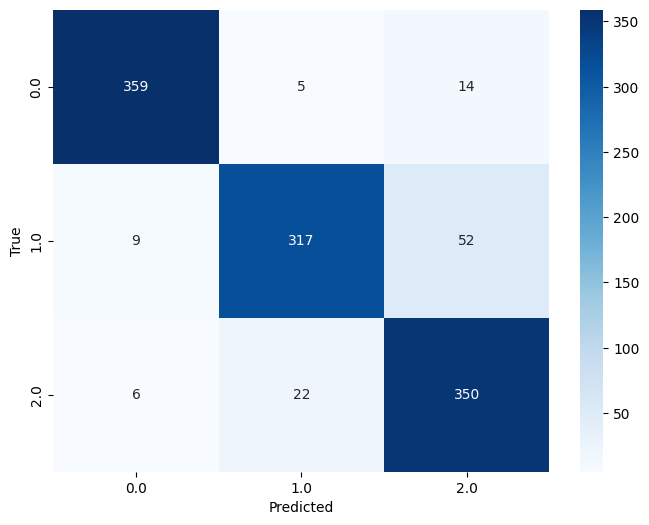

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_labels = sorted(set(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()


## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       378
         1.0       0.91      0.84      0.87       378
         2.0       0.83      0.91      0.87       378

    accuracy                           0.90      1134
   macro avg       0.90      0.90      0.90      1134
weighted avg       0.90      0.90      0.90      1134



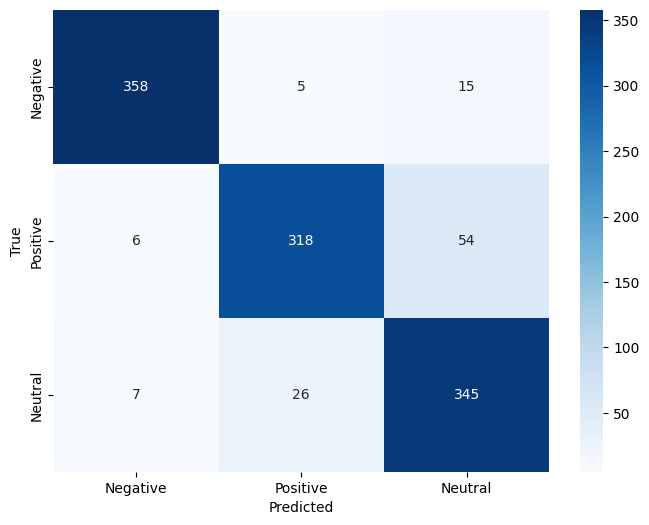

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_labels = ['Negative', 'Positive', 'Neutral']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
# ax.set_xticklabels(custom_labels, rotation=45)
# ax.set_yticklabels(custom_labels, rotation=0)
plt.show()


## NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       378
         1.0       0.93      0.77      0.84       378
         2.0       0.80      0.90      0.84       378

    accuracy                           0.87      1134
   macro avg       0.88      0.87      0.87      1134
weighted avg       0.88      0.87      0.87      1134



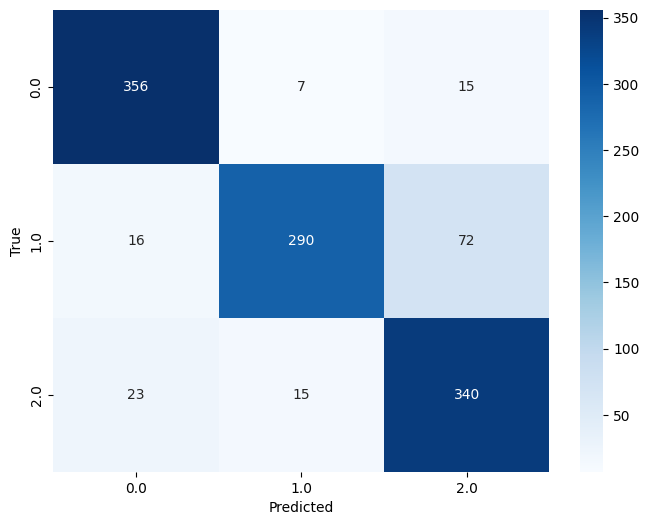

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_labels = sorted(set(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#Performence comparision of Models

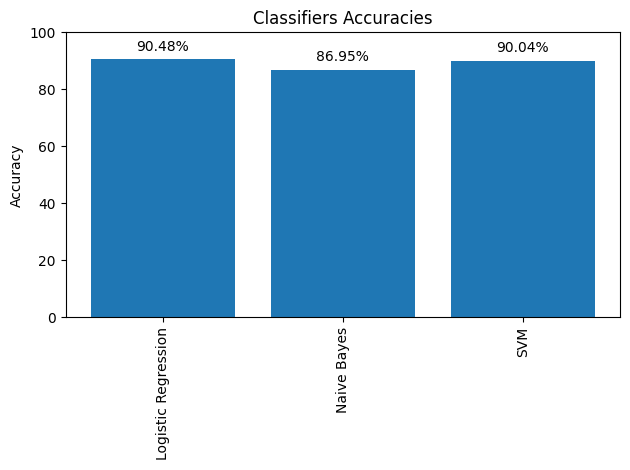

In [ ]:
import matplotlib.pyplot as plt


models = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracies = [accuracy_lr*100, accuracy_nb*100, accuracy_svm*100]


plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Classifiers Accuracies')
plt.xticks(rotation='vertical')

# Display the accuracies at the top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 2, f'{acc:.2f}%', ha='center', va='bottom', fontsize=10)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


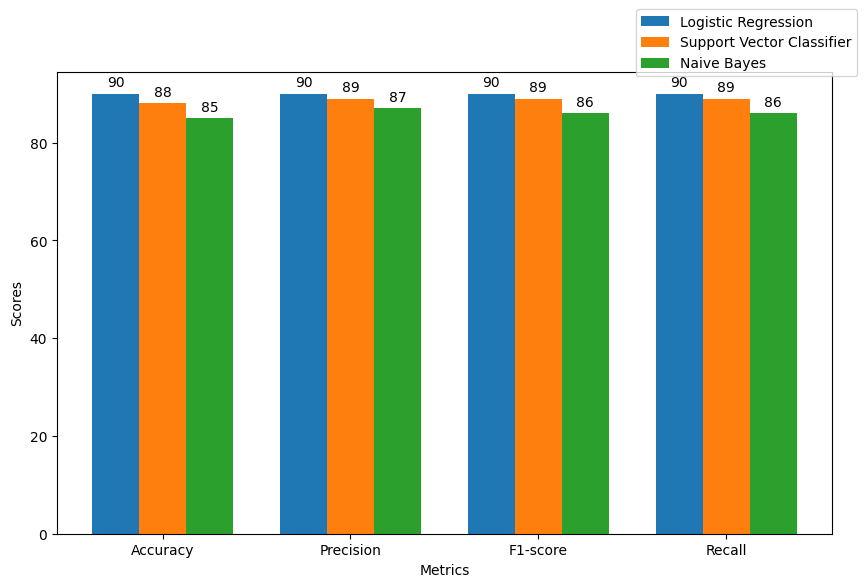

In [ ]:
import matplotlib.pyplot as plt

model1_metrics = {'Accuracy': 90, 'Precision': 90, 'F1-score': 90, 'Recall': 90}
model2_metrics = {'Accuracy': 88, 'Precision': 89, 'F1-score': 89, 'Recall': 89}
model3_metrics = {'Accuracy': 85, 'Precision': 87, 'F1-score': 86, 'Recall': 86}

metrics = list(model1_metrics.keys())
model1_values = list(model1_metrics.values())
model2_values = list(model2_metrics.values())
model3_values = list(model3_metrics.values())

bar_width = 0.25
index = range(len(metrics))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, model1_values, bar_width, label='Logistic Regression')
bar2 = ax.bar([i + bar_width for i in index], model2_values, bar_width, label='Support Vector Classifier')
bar3 = ax.bar([i + 2 * bar_width for i in index], model3_values, bar_width, label='Naive Bayes')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(metrics)

# Move the legend to the top-left corner outside the graph
ax.legend(bbox_to_anchor=(0.89, 1.15), loc='upper center')

def add_values_on_top(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values_on_top(bar1)
add_values_on_top(bar2)
add_values_on_top(bar3)

plt.show()
